In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.style.use('ggplot')

In [122]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


In [123]:
train['Source'] = 'Train'
test['Source'] = 'Test'
data = pd.concat([train, test], ignore_index=True)
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999.0,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009.0,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999.0,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998.0,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987.0,OUT013,Tier 3,High,Supermarket Type1,Train


In [124]:
data.apply(lambda a : sum(a.isnull()))

Item_Fat_Content                1
Item_Identifier                 1
Item_MRP                        1
Item_Outlet_Sales            5682
Item_Type                       1
Item_Visibility                 1
Item_Weight                  2439
Outlet_Establishment_Year       1
Outlet_Identifier               1
Outlet_Location_Type            1
Outlet_Size                  4017
Outlet_Type                     1
Source                          0
dtype: int64

In [125]:
data[data.Item_Identifier.isnull()]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source
8523,NaN,NaN,NaN,NaN,NaN,NaN,12.858978,NaN,NaN,NaN,NaN,NaN,Train


In [126]:
data.drop(8523, inplace=True)

In [127]:
Item_type_mapping = {'Dairy': 1, 'Soft Drinks': 2, 'Meat': 3, 'Fruits and Vegetables': 4, 'Household': 5, 'Baking Goods': 6, 'Snack Foods': 7, 
                     'Frozen Foods': 8, 'Breakfast': 9, 'Health and Hygiene': 10, 'Hard Drinks': 11, 'Canned': 12, 'Breads' : 13, 
                     'Starchy Foods': 14, 'Others': 15, 'Seafood': 16}

data['Item_Type'] = data['Item_Type'].map(Item_type_mapping)
mean_item_weight = np.zeros(16)

for i in range(0,16):
    vals = data[data['Item_Type'] == (i+1)]['Item_Weight'].dropna()
    mean_item_weight[i] = vals.mean()


In [128]:
mean_item_weight

array([ 13.23835813,  11.78840796,  12.76610379,  13.19440612,
        13.33797665,  12.27521111,  12.865732  ,  12.5693234 ,
        13.17911184,  13.17173944,  11.57620462,  12.34082962,
        11.15236152,  13.65975771,  13.91572368,  12.76027397])

In [129]:
for i in range(0,16):
    data.loc[(data['Item_Type'] == (i+1)) & (data['Item_Weight'].isnull()), 'Item_Weight'] = mean_item_weight[i] 

In [130]:
print('Unique Item_Fat_Content:', data['Item_Fat_Content'].unique())
print('Unique Outlet_Location_Type:', data['Outlet_Location_Type'].unique())
print('Unique Outlet_Size:', data['Outlet_Size'].unique())
print('Unique Outlet_Type:', data['Outlet_Type'].unique())

Unique Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Unique Outlet_Size: ['Medium' nan 'High' 'Small']
Unique Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [131]:
data['Item_Fat_Content'].replace(('LF', 'reg', 'low fat'), ('Low Fat', 'Regular', 'Low Fat'), inplace=True)

In [132]:
data['AgeOfShop'] = 2013 - data['Outlet_Establishment_Year']

In [133]:
data['FoodType'] = data['Item_Identifier'].str.slice(0,2)

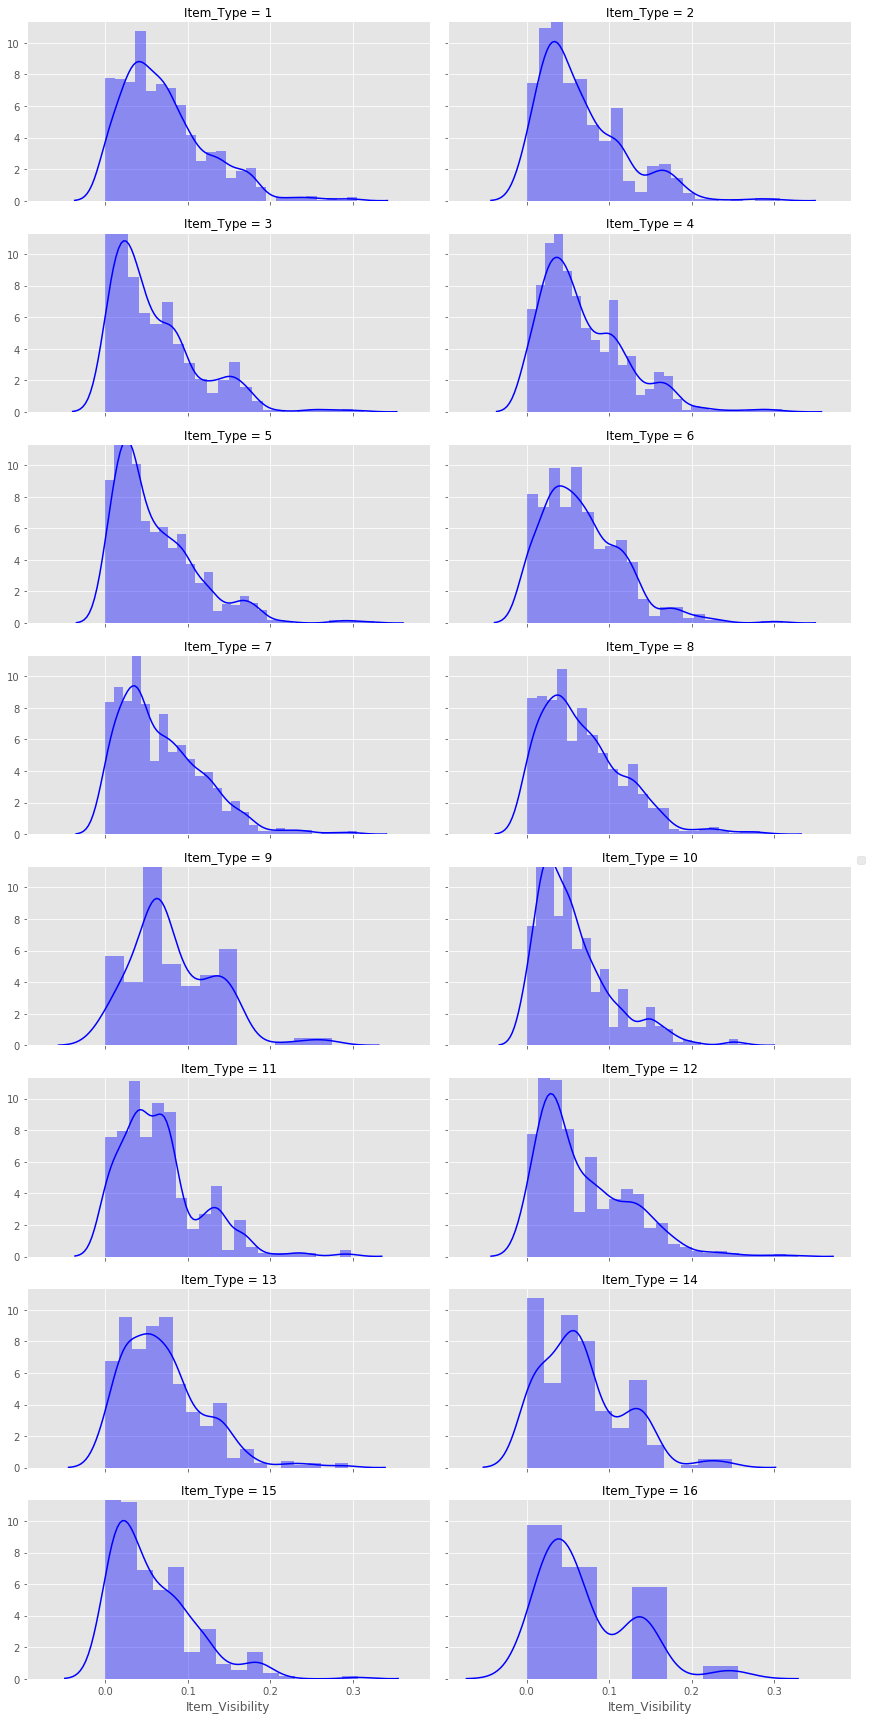

In [134]:
grid = sns.FacetGrid(data, col='Item_Type',  aspect=2, col_wrap=2)
grid.map(sns.distplot, 'Item_Visibility', color='blue')
grid.add_legend()

In [135]:
mean_item_visibility = np.zeros(16)

for i in range(0,16):
    vals = data[(data['Item_Type'] == (i+1)) & (data['Item_Visibility'] != 0.00)]['Item_Visibility']
    mean_item_visibility[i] = vals.mean()
    

In [136]:
for i in range(0,16):
    data.loc[(data['Item_Type'] == (i+1)) & (data['Item_Visibility'] == 0.00), 'Item_Visibility'] = mean_item_visibility[i] 

In [137]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,AgeOfShop,FoodType
0,Low Fat,FDA15,249.8092,3735.1380,1,0.016047,9.30,1999.0,OUT049,Tier 1,Medium,Supermarket Type1,Train,14.0,FD
1,Regular,DRC01,48.2692,443.4228,2,0.019278,5.92,2009.0,OUT018,Tier 3,Medium,Supermarket Type2,Train,4.0,DR
2,Low Fat,FDN15,141.6180,2097.2700,3,0.016760,17.50,1999.0,OUT049,Tier 1,Medium,Supermarket Type1,Train,14.0,FD
3,Regular,FDX07,182.0950,732.3800,4,0.073305,19.20,1998.0,OUT010,Tier 3,NaN,Grocery Store,Train,15.0,FD
4,Low Fat,NCD19,53.8614,994.7052,5,0.063186,8.93,1987.0,OUT013,Tier 3,High,Supermarket Type1,Train,26.0,NC


In [138]:
Item_Fat_Content_mapping = {'Low Fat' :1, 'Regular':2}
Outlet_Location_Type_mapping = {'Tier 1':1, 'Tier 3':3, 'Tier 2':2}
Outlet_Type_mapping = {'Supermarket Type1':1, 'Supermarket Type2':2, 'Grocery Store':4, 'Supermarket Type3':3}

In [139]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].map(Item_Fat_Content_mapping)
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map(Outlet_Location_Type_mapping)
data['Outlet_Type'] = data['Outlet_Type'].map(Outlet_Type_mapping)

In [140]:
OXtrain = data.loc[data.iloc[:,10].notnull(), ('Outlet_Location_Type','Outlet_Type','AgeOfShop')].values
OXtest = data.loc[data.iloc[:,10].isnull(), ('Outlet_Location_Type','Outlet_Type','AgeOfShop')].values
Oytrain = data.loc[data.iloc[:,10].notnull(), 'Outlet_Size'].values
Oytest = data.loc[data.iloc[:,10].isnull(), 'Outlet_Size'].values

In [141]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50, criterion='gini')
classifier.fit(OXtrain, Oytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
Opred = classifier.predict(OXtest)

In [143]:
data.loc[data.iloc[:,10].isnull(), 'Outlet_Size'] = Opred

In [144]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,AgeOfShop,FoodType
0,1,FDA15,249.8092,3735.1380,1,0.016047,9.30,1999.0,OUT049,1,Medium,1,Train,14.0,FD
1,2,DRC01,48.2692,443.4228,2,0.019278,5.92,2009.0,OUT018,3,Medium,2,Train,4.0,DR
2,1,FDN15,141.6180,2097.2700,3,0.016760,17.50,1999.0,OUT049,1,Medium,1,Train,14.0,FD
3,2,FDX07,182.0950,732.3800,4,0.073305,19.20,1998.0,OUT010,3,Medium,4,Train,15.0,FD
4,1,NCD19,53.8614,994.7052,5,0.063186,8.93,1987.0,OUT013,3,High,1,Train,26.0,NC


In [145]:
data['FoodType'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [146]:
Outlet_Size_Type_mapping = {'Small':1, 'High':3, 'Medium':2}
data['Outlet_Size'] = data['Outlet_Size'].map(Outlet_Size_Type_mapping)

In [147]:
encoder = LabelEncoder()

data.iloc[:, -1 ] = encoder.fit_transform(data.iloc[:, -1 ])

In [148]:
# FoodType_Type_mapping = {'FD':1, 'DR':3, 'NC':2}
# data['FoodType'] = data['FoodType'].map(FoodType_Type_mapping)

In [149]:
X = data.loc[data.Source == 'Train', ['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 
                                  'Outlet_Location_Type','Outlet_Size', 'Outlet_Type', 'AgeOfShop',  'FoodType']].values
y = data.loc[data.Source == 'Train', 'Item_Outlet_Sales'].values
Xtest = data.loc[data.Source == 'Test', ['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 
                                  'Outlet_Location_Type','Outlet_Size', 'Outlet_Type', 'AgeOfShop',  'FoodType']].values

In [150]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [151]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=500)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [152]:
y_pred2 = regressor.predict(X_validate)

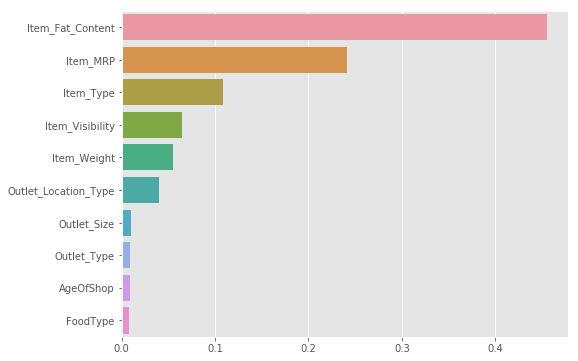

In [153]:
imp = pd.Series(regressor.feature_importances_).sort_values(ascending=False)
sns.barplot(y=['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 
                                  'Outlet_Location_Type','Outlet_Size', 'Outlet_Type', 'AgeOfShop',  'FoodType'], x = imp, orient='h')  

In [154]:
np.sqrt(metrics.mean_squared_error(y_validate, y_pred2))

1140.9798170029831

In [155]:
finalpred = regressor.predict(Xtest)

In [156]:
finaldf = pd.DataFrame(finalpred)

In [157]:
finaldf.to_csv('Attempt3.csv')

## Diferent features

In [158]:
X = data.loc[data.Source == 'Train', ['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 
                                  'Outlet_Location_Type',  'FoodType']].values
y = data.loc[data.Source == 'Train', 'Item_Outlet_Sales'].values
Xtest = data.loc[data.Source == 'Test', ['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 
                                  'Outlet_Location_Type',  'FoodType']].values

In [159]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [160]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=500)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [161]:
y_pred2 = regressor.predict(X_validate)

In [162]:
np.sqrt(metrics.mean_squared_error(y_validate, y_pred2))

1319.4558040118031

## Linear regression

In [163]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,AgeOfShop,FoodType
0,1,FDA15,249.8092,3735.1380,1,0.016047,9.30,1999.0,OUT049,1,2,1,Train,14.0,1
1,2,DRC01,48.2692,443.4228,2,0.019278,5.92,2009.0,OUT018,3,2,2,Train,4.0,0
2,1,FDN15,141.6180,2097.2700,3,0.016760,17.50,1999.0,OUT049,1,2,1,Train,14.0,1
3,2,FDX07,182.0950,732.3800,4,0.073305,19.20,1998.0,OUT010,3,2,4,Train,15.0,1
4,1,NCD19,53.8614,994.7052,5,0.063186,8.93,1987.0,OUT013,3,3,1,Train,26.0,2


In [164]:
X = data.loc[data.Source == 'Train', ['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 
                                  'Outlet_Location_Type','Outlet_Size', 'Outlet_Type', 'AgeOfShop']].values
y = data.loc[data.Source == 'Train', 'Item_Outlet_Sales'].values
Xtest = data.loc[data.Source == 'Test', ['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility', 'Item_Weight', 
                                  'Outlet_Location_Type','Outlet_Size', 'Outlet_Type', 'AgeOfShop']].values

In [165]:
hotencoder = OneHotEncoder(categorical_features=[2,5,6,7])

X = hotencoder.fit_transform(X).toarray()
Xtest = hotencoder.fit_transform(Xtest).toarray()

In [166]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.2)

In [167]:
lmregressor = LinearRegression(normalize=True)

lmregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [168]:
y_pred = lmregressor.predict(X_validate)

In [169]:
np.sqrt(metrics.mean_squared_error(y_validate, y_pred))

1153.0208326412792

In [170]:
metrics.r2_score(y_validate, y_pred)

0.55374472226644689

In [171]:
np.sqrt(metrics.mean_squared_error(y_train, lmregressor.predict(X_train)))

1122.5388786454298

In [172]:
finalpred = lmregressor.predict(Xtest)

In [173]:
finaldf = pd.DataFrame(finalpred)

In [174]:
finaldf.to_csv('Attempt4.csv')

## Lasso

In [175]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

clf = LassoCV()
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X_train, y_train)
n_features = sfm.transform(X).shape[1]

In [176]:
from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train, y_train)

# run prediction on the training set to get a rough idea of how well it does
y_pred = regr.predict(X_validate)

In [177]:
np.sqrt(metrics.mean_squared_error(y_validate, y_pred))

1151.5967500013558

In [178]:
    regr.coef_

array([ -1.00160917e+02,   3.96793715e+01,  -1.68945836e+00,
         5.18390563e+01,  -7.34334527e+01,  -1.30119671e+00,
        -2.28169530e-01,  -1.44123726e+01,   5.12149071e+01,
        -2.07470907e+01,   2.42457110e-02,   7.46314435e+00,
         5.53035909e+01,   4.63043659e+00,  -2.39583390e+01,
         2.08815485e+02,   3.59360423e+02,   1.71244179e+02,
        -7.49359364e+01,  -2.83463699e+02,  -2.46989149e+02,
         5.30821218e+02,   0.00000000e+00,  -2.78061275e+02,
         2.25083105e+03,  -1.51318209e+03,   3.43629003e+01,
         1.54768843e+01,  -1.24318552e+02,  -1.62245284e-01,
        -3.35586782e+01])